In [1]:
from path_helpers import *
from path_finders import *
from percolation import *

P_10 = Percolation(np.zeros((10,10)), RecPathFinder(SquareNeighbours()))
PT_10 = PercolationTools(P_10)

## Task 1

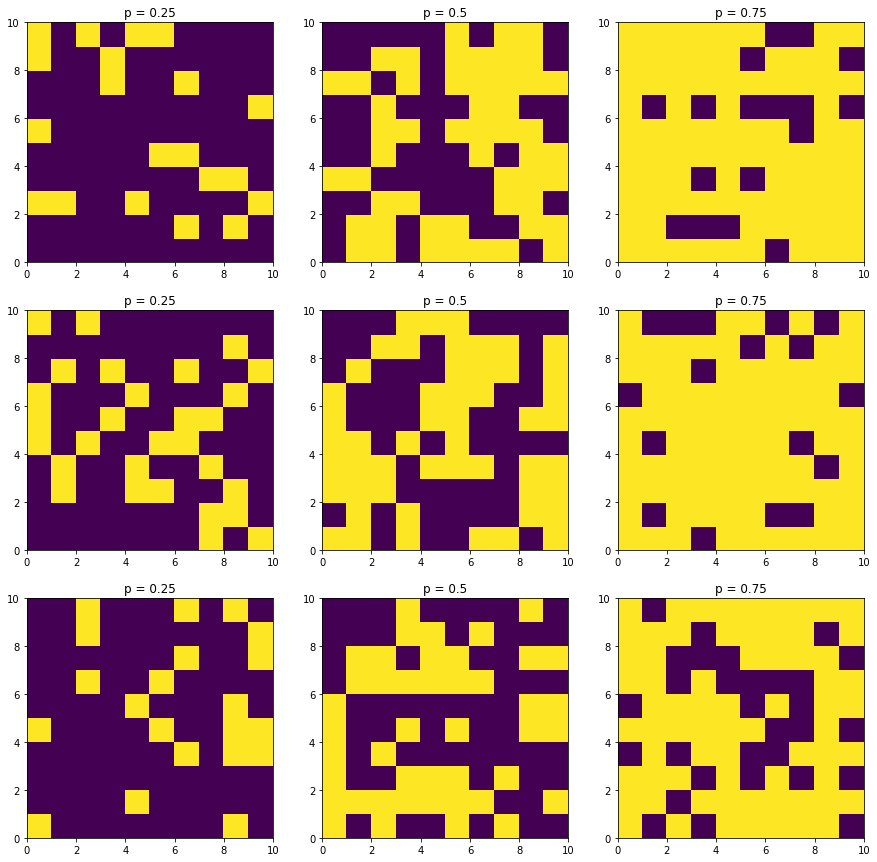

In [2]:
import matplotlib.pyplot as plt

trials = 3

fig, axs = plt.subplots(nrows = trials, ncols=3, figsize=(15, 15))

for i in range(0, trials):
    P_10.percolate(0.25)
    PT_10.display(axs[i,0])
    axs[i,0].set_title('p = 0.25')
    P_10.percolate(0.5)
    PT_10.display(axs[i,1])
    axs[i,1].set_title('p = 0.5')
    P_10.percolate(0.75)
    PT_10.display(axs[i,2])
    axs[i,2].set_title('p = 0.75')

$F_n(p)$ appears to be low for $p<0.5$ and large for $p>0.5$

## Task 2

In [3]:
iters = 50

P_05 = Percolation(np.zeros((5, 5)), RecPathFinder(SquareNeighbours()))

print("F_5(0.25) ≈ ", P_05.simulate(iters, 0.25))
print("F_10(0.25) ≈ ", P_10.simulate(iters, 0.25))

print("F_5(0.5) ≈ ", P_05.simulate(iters, 0.5))
print("F_10(0.5) ≈ ", P_10.simulate(iters, 0.5))

print("F_5(0.75) ≈ ", P_05.simulate(iters, 0.75))
print("F_10(0.75) ≈ ", P_10.simulate(iters, 0.75))

F_5(0.25) ≈  0.02
F_10(0.25) ≈  0.0
F_5(0.5) ≈  0.28
F_10(0.5) ≈  0.14
F_5(0.75) ≈  0.96
F_10(0.75) ≈  0.96


## Task 3

We're happy with the speed of the recursive algorithm however as Python doesn't have "tail-recursion optimisation" it breakes for large n so we developed a second algorithm which achieves similar speeds and supports larger n.

In [4]:
import timeit

iters = 50

P_Rob = Percolation(np.zeros((20, 20)), RobotPathFinder(SquareStateChooser()))
P_Rec = Percolation(np.zeros((20, 20)), RecPathFinder(SquareNeighbours()))

print(timeit.timeit(lambda: P_Rob.simulate(iters, 0.5), number=10))
print(timeit.timeit(lambda: P_Rec.simulate(iters, 0.5), number=10))

4.009756818000001
2.789686191999998


## Task 4

Should use robot alg here and forward.

First we'll try computing a whole load of values and plotting them. Then we'll use a binary search to hone in on $p_c$

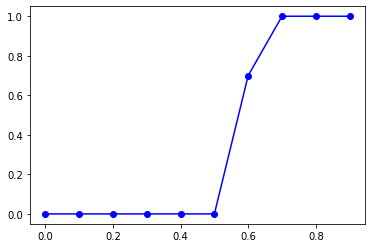

In [5]:
P_100 = Percolation(np.zeros((100, 100)), RobotPathFinder(SquareStateChooser()))
PT_100 = PercolationTools(P_100)

PT_100.find_critical_value_g(20, 1)

In [6]:
print("pc = ", PT_100.find_critical_value_bs(50, 20))

0 0.5 1 0.0
0.5 0.75 1 1.0
0.5 0.625 0.75 0.96
0.5 0.5625 0.625 0.06
0.5625 0.59375 0.625 0.6
0.5625 0.578125 0.59375 0.12
0.578125 0.5859375 0.59375 0.38
0.5859375 0.58984375 0.59375 0.38
0.58984375 0.591796875 0.59375 0.5
0.58984375 0.5908203125 0.591796875 0.56
0.58984375 0.59033203125 0.5908203125 0.42
0.59033203125 0.590576171875 0.5908203125 0.42
0.590576171875 0.5906982421875 0.5908203125 0.48
0.5906982421875 0.59075927734375 0.5908203125 0.52
0.5906982421875 0.590728759765625 0.59075927734375 0.48
0.590728759765625 0.5907440185546875 0.59075927734375 0.48
0.5907440185546875 0.5907516479492188 0.59075927734375 0.4
0.5907516479492188 0.5907554626464844 0.59075927734375 0.4
0.5907554626464844 0.5907573699951172 0.59075927734375 0.44
0.5907573699951172 0.5907583236694336 0.59075927734375 0.48
pc =  0.5907588005065918


## Task 5: Skipped

Choose to skip due to:

- code elegance of only using a single parameter
- time-constraints of project and we thought other tasks were more interested / valuable

## Task 6

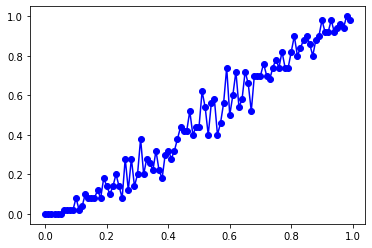

In [9]:
P_21 = Percolation(np.zeros((21, 21)), RecPathFinder(SquareNeighbours()))
PT_21 = PercolationTools(P_21)

PT_21.plot_centre_prob(50,2)

## Task 7

In [10]:
TP_100 = Percolation(np.zeros((100,100)), RobotPathFinder(TriangleStateChooser()))
TPT_100 = PercolationTools(TP_100)

print("pc = ", TPT_100.find_critical_value_bs(50, 20))

0 0.5 1 0.54
0 0.25 0.5 0.0
0.25 0.375 0.5 0.0
0.375 0.4375 0.5 0.0
0.4375 0.46875 0.5 0.06
0.46875 0.484375 0.5 0.18
0.484375 0.4921875 0.5 0.34
0.4921875 0.49609375 0.5 0.38
0.49609375 0.498046875 0.5 0.34
0.498046875 0.4990234375 0.5 0.4
0.4990234375 0.49951171875 0.5 0.54
0.4990234375 0.499267578125 0.49951171875 0.66
0.4990234375 0.4991455078125 0.499267578125 0.36
0.4991455078125 0.49920654296875 0.499267578125 0.42
0.49920654296875 0.499237060546875 0.499267578125 0.54
0.49920654296875 0.4992218017578125 0.499237060546875 0.46
0.4992218017578125 0.49922943115234375 0.499237060546875 0.46
0.49922943115234375 0.4992332458496094 0.499237060546875 0.5
0.49922943115234375 0.49923133850097656 0.4992332458496094 0.5
0.49922943115234375 0.49923038482666016 0.49923133850097656 0.54
pc =  0.49922990798950195


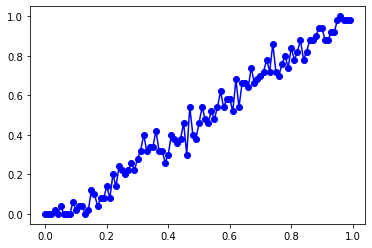

In [2]:
P_50 = Percolation(np.zeros((21, 21)), RecPathFinder(TriangleNeighbours()))
PT_50 = PercolationTools(P_50)

PT_50.plot_centre_prob(50,2)

## Task 8

https://stackoverflow.com/questions/18442116/fitting-an-exponential-approach-asymptotic-power-law-in-r-python/18442766

In [12]:
import numpy as np
import scipy

def beta(n):
    TP = Percolation(np.zeros((n,n)), RecPathFinder(TriangleNeighbours()))
    
    def exponential(x, beta):
        return x**beta

    xs = [0.5 + e for e in np.linspace(0, 1e-2, 100)]
    ys = [TP.simulate_centre(50, x) for x in xs]

    fit_data, covariance = scipy.optimize.curve_fit(exponential, xs, ys, 0.5)
    
    return fit_data[0]

betas = [beta(21) for _ in range(50)]

plt.hist(betas)

KeyboardInterrupt: 